# Breast Cancer Detection using Machine Learning :
***
In this notebook we will use six different machine learning algorithms on the Wisconsin Diagnostic Breast Cancer Dataset to classify whether the breast cancer is benign or malignant. 

   1. Introduction
   2. Load dependencies
   3. Data Preparation
   4. Load Dataset 
   5. Basic Data Exploration
      1. Data Shape
      2. Columns Name
      3. Basic Statistics
      4. Data types
   6. Data Cleaning & Visualization
      1. Histogram of Radius Mean for Bening and Malignant Tumors
      2. Drop unnamed features
      3. Replace the diagnosis of malignant or benign with 1's and 0's 
      4. Count of diagnosis (Benign / Malignant) Variable 
      5. Distribution of (Beningn Vs Malignant) Variable 
   7. Select Train & Targer Variables
   8. Feature Scaling
   9. Dimensionality Reduction (PCA)
   10. Split Dataset
   11. Model Selection
   12. Model Evaluation
      1. Classification Report
      2. Confusion Matrix
      3. ROC Curve
      4. Accuracy Score
   13. Conclusion
   
Credit : [Vishabh Goel](https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3)

# Introduction :
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

### Recommended Screening Guidelines :
**Mammography** : The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.

**Women age 40–45 or older** who are at average risk of breast cancer should have a mammogram once a year.

**Women at high risk** should have yearly mammograms along with an MRI starting at age 30.

### Some Risk Factors for Breast Cancer :
The following are some of the known risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

**Age** : The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

**Personal history of breast cancer** : A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

**Family history of breast cancer** : A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

**Genetic factors** : Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

**Childbearing and menstrual history** : The older a woman is when she has her first child, the greater her risk of breast cancer. Also at higher risk are:

   - Women who menstruate for the first time at an early age (before 12).
    
    
   - Women who go through menopause late (after age 55).
    
    
   - Women who’ve never had children.

## Load dependencies :

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Ignore warning messages:
import warnings
warnings.filterwarnings('ignore') 

## Data preparation :
The dataset used in this notebook is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector. 

[UCI Machine Learning Repository for breast cancer](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

Attribute information :

  -  ID Number.
  
  -  Diagnosis (M = malignant, B = benign) 3–32).
  
Ten real-valued features are computed for each cell nucleus :

  1. Radius (mean of distances from center to points on the perimeter).
  2. Texture (standard deviation of gray-scale values).
  3. Perimeter.
  4. Area.
  5. Smoothness (local variation in radius lengths).
  6. Compactness (perimeter² / area — 1.0).
  7. Concavity (severity of concave portions of the contour).
  8. Concave points (number of concave portions of the contour).
  9. Symmetry.
  10. Fractal dimension (“coastline approximation” — 1).
  
The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

## Load Dataset : 

In [2]:
df = pd.read_csv('breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Basic Data Exploration :
### Data shape :

In [3]:
print("Data Shape :",df.shape)

Data Shape : (569, 33)


### Columns Name :

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Basic Statistics :

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Data types :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data cleaning & visualization :
### Histogram of Radius Mean for (Bening / Malignant) Tumors :

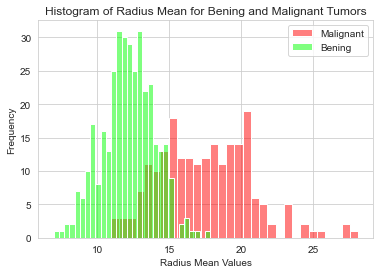

Most frequent malignant radius mean is:  20.101999999999997


In [7]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

From  graph above, we can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly, and also the bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)

In [8]:
#check null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#check NaN values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Drop unnamed feature :

In [10]:
new_df = df.drop(columns=['Unnamed: 32', 'id'])

### Replace the diagnosis of malignant or benign with 1's and 0's :

In [11]:
new_df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

### Count of diagnosis (Benign / Malignant) Variable :

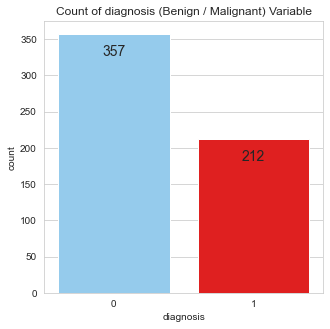

In [12]:
sample_size = new_df.shape[0] 
 
counts = new_df.iloc[:sample_size,:].groupby('diagnosis')['diagnosis'].count()

f = plt.figure(figsize=(5,5))
f.add_subplot(111)
    
sns.countplot(new_df['diagnosis'], palette=['lightskyblue','red'])

for i in counts.index:
    plt.text(i,counts.values[i]-30,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.title("Count of diagnosis (Benign / Malignant) Variable")
plt.show()

### Distribution of diagnosis (Beningn Vs Malignant) Variable :

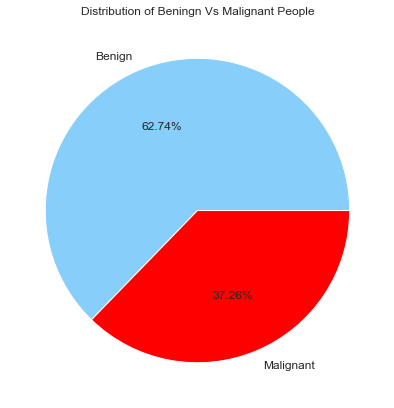

In [13]:
f = plt.figure(figsize=(7,7))
f.add_subplot(111)
df.diagnosis.value_counts().plot.pie(labels = ("Benign", "Malignant"), label="", autopct = "%.2f%%", fontsize = 12., colors=['lightskyblue','red'])
plt.title("Distribution of Beningn Vs Malignant People")
plt.show()

## Select Train & Target Variables :

In [14]:
X = new_df.iloc[:, 1:].values # train variable
Y = new_df['diagnosis'] # targer variable

## Feature Scaling :

In [15]:
# Using standard scaler to receive values from +3 to -3
X = StandardScaler().fit_transform(X)

## Reduce the dimensionality of our Dataset (PCA) :

In [16]:
# Applying PCA to reduce the dimensionality our datasset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

## Splitting Dataset :

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Model Selection :
In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use several ML Classification algorithms and compare the results. 

Here is the set of algorithms we will use :
   1. Logistic Regression
   2. K-Nearest Neighbor
   3. SVM
   4. Naive Bayes Classifier
   5. Decision Tree
   6. Random Forest

In [18]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state = 0)
LR_clf.fit(X_train, y_train)
Y_predict1 = LR_clf.predict(X_test)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KN_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN_clf.fit(X_train, y_train)
Y_predict2 = KN_clf.predict(X_test)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
# We define the SVM model
SVM_clf = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True),  n_jobs=-1))
#SVM_clf = SVC(kernel = 'rbf', random_state = 0)
SVM_clf.fit(X_train, y_train)
Y_predict3 = SVM_clf.predict(X_test)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
Y_predict4 = NB_clf.predict(X_test)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_clf.fit(X_train, y_train)
Y_predict5 = DT_clf.predict(X_test)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_clf.fit(X_train, y_train)
Y_predict6 = RF_clf.predict(X_test)

## Model Evaluation :

### Classification Report :

In [19]:
print("Logistic Regression : \n \n", classification_report(y_test,Y_predict1),"\n")
print("KNeighbors Classifier : \n \n", classification_report(y_test,Y_predict2),"\n")
print("SVM : \n \n", classification_report(y_test,Y_predict3),"\n")
print("Naïve Bayes : \n \n", classification_report(y_test,Y_predict4),"\n")
print("Decision Tree : \n \n", classification_report(y_test,Y_predict5),"\n")
print("Random Forest : \n \n", classification_report(y_test,Y_predict6),"\n")

Logistic Regression : 
 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

KNeighbors Classifier : 
 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 

SVM : 
 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weight

### Confusion Matrix :

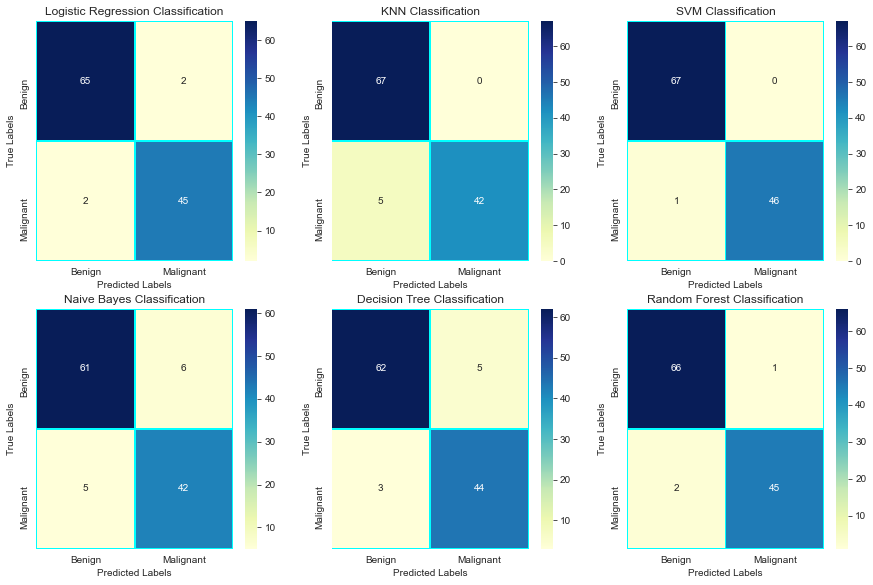

In [20]:
logreg_cm = confusion_matrix(y_test, Y_predict1)  # Logistic Regression
knncla_cm = confusion_matrix(y_test, Y_predict2)  # KNN
svmcla_cm = confusion_matrix(y_test, Y_predict3)  # SVM
nbcla_cm = confusion_matrix(y_test, Y_predict4)   # Naive Bayes
dtcla_cm = confusion_matrix(y_test, Y_predict5)   # Decision Tree
rfcla_cm = confusion_matrix(y_test, Y_predict6)   # Random Forest

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification')
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('KNN Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)

ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('True Labels')
ax1.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax1.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('True Labels')
ax2.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax2.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax3.set_xlabel('Predicted Labels')
ax3.set_ylabel('True Labels')
ax3.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax3.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax4.set_xlabel('Predicted Labels')
ax4.set_ylabel('True Labels')
ax4.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax4.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax5.set_xlabel('Predicted Labels')
ax5.set_ylabel('True Labels')
ax5.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax5.yaxis.set_ticklabels(['Benign', 'Malignant'])

ax6.set_xlabel('Predicted Labels')
ax6.set_ylabel('True Labels')
ax6.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax6.yaxis.set_ticklabels(['Benign', 'Malignant'])

plt.show()

### ROC Curve :

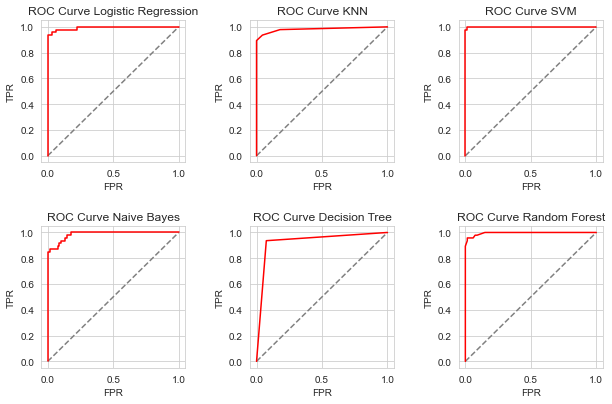

In [21]:
# Logistic Regression 
Y_predict1_proba = LR_clf.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Logistic Regression')

# KNN 
Y_predict2_proba = KN_clf.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve KNN')

# SVM 
Y_predict3_proba = SVM_clf.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve SVM')

# Naive Bayes 
Y_predict4_proba = NB_clf.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Naive Bayes')

# Decision Tree 
Y_predict5_proba = DT_clf.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Decision Tree')

# Random Forest 
Y_predict6_proba = RF_clf.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--', color='gray')
plt.plot(fpr,tpr, label='ANN', color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Random Forest')
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

### Accuracy Score :

In [22]:
score_1 = accuracy_score(y_test, Y_predict1) # Logistic Regression
score_2 = accuracy_score(y_test, Y_predict2) # KNN
score_3 = accuracy_score(y_test, Y_predict3) # SVM
score_4 = accuracy_score(y_test, Y_predict4) # Naive Bayes
score_5 = accuracy_score(y_test, Y_predict5) # Decision Tree
score_6 = accuracy_score(y_test, Y_predict6) # Random Forest

print("Logistic Regression Accuracy : ", round(score_1, 4))
print("KNN Accuracy :", round(score_2, 4))
print("SVM Accuracy :", round(score_3, 4))
print("Naive Bayes Accuracy :", round(score_4, 4))
print("Desicion Tree Accuracy :", round(score_5, 4))
print("Random Forest Accuracy :", round(score_6, 4))

Logistic Regression Accuracy :  0.9649
KNN Accuracy : 0.9561
SVM Accuracy : 0.9912
Naive Bayes Accuracy : 0.9035
Desicion Tree Accuracy : 0.9298
Random Forest Accuracy : 0.9737


After applying the different classification models, we have got below accuracies with different models:
  1. Logistic Regression : **96.49 %**
  2. K-Nearest Neighbor : **95.61 %**
  3. SVM : **99.12 %**
  4. Naive Bayes : **90.35 %**
  5. Desicion Tree : **92.98 %**
  6. Random Forest : **97.37 %**
  
# Conclusion :
Finally, we have built our classification model and we can see that **SVM** algorithm gives the best results for our dataset. Well its not always applicable to every dataset, to choose our model we always need to analyze our dataset, then apply our machine learning algorithm.